## Problem Statement::

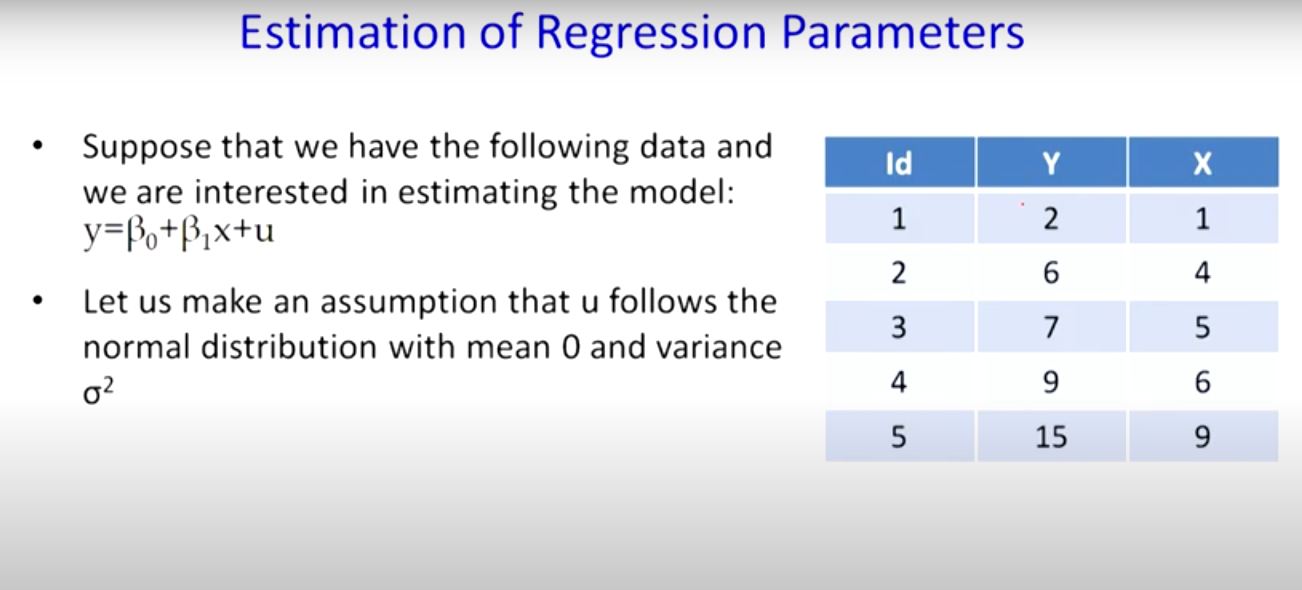

## SOLUTION::

In [27]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/Regression1_MLE/MLE.xlsx")
data

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


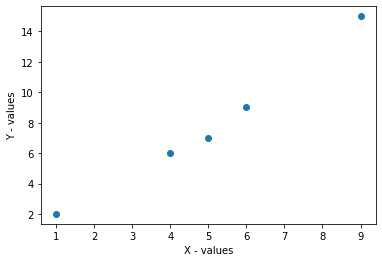

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['X'],data['Y'])
plt.xlabel("X - values")
plt.ylabel("Y - values")
plt.show()

In [29]:
import statsmodels.api as s
from statsmodels.regression.linear_model import OLS

x = data['X']
y = data['Y']
reg_model = OLS(y,s.add_constant(x)).fit()
reg_model.summary()

/home/ashish/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 19 Jan 2022   Prob (F-statistic):            0.00122
Time:                        01:10:27   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
## dispalying the residuals
residuals = reg_model.resid
residuals


0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [31]:
## calculating standard deviation for error/residual values
import numpy as np
np.std(residuals)

0.6048820983804831

## So using the least sqaure estimation method for regression
    b0 = -0.2882,b1 = 1.6176,std =  0.6048820983804831

## Finding the same parameters of regression using MLE (Maximum LIkelihood Estimator)

In [32]:
import numpy as np
from scipy.optimize import minimize
def lik(parameters):
    slope = parameters[0]
    intercept = parameters[1]
    sigma = parameters[2]
    for i  in np.arange(0,len(x)):                  ##arange --> Returns an array with evenly spaced elements as per the interval
        y_exp = slope*x + intercept
    likelihood_func = (len(x)/2*np.log(2*np.pi) + len(x)/2*np.log(sigma**2) + 1/(2*sigma**2)*sum((y-y_exp)**2))
    return likelihood_func

likelihood_model = minimize(lik,np.array([2,2,2]),method='L-BFGS-B')
likelihood_model

      fun: 4.581084072762661
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.45661262e-05, 9.76996262e-07, 1.00364161e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 104
      nit: 17
     njev: 26
   status: 0
  success: True
        x: array([ 1.61764714, -0.28823562,  0.60488246])

# NOTE::
## Use this method to know the available methods for likelihood minimize function::
    minimize?

## Again,using the maximum likelihood estimation method for regression, we get the same value for parameters::
    b0 = -0.28823562,b1 = 1.61764714,std =  0.60488246

In [33]:
## for specifically getting the parameters
likelihood_model.x

array([ 1.61764714, -0.28823562,  0.60488246])